In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
import keras
import os
import keras.backend as K

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Using TensorFlow backend.


In [0]:
os.chdir('/content/drive/My Drive/btp')
train = pd.read_csv('pred_train.csv').drop(labels = ['label1', 'label2', 'cycle'], axis = 1)
test = pd.read_csv('pred_test.csv').drop(labels = ['label1', 'label2', 'cycle'], axis = 1)

In [0]:
pd.set_option('display.max_columns', None)

In [4]:
print(train.shape, test.shape)

(20631, 27) (13096, 27)


In [5]:
train.head()

,id,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,cycle_norm
0,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0.00000
1,1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0.00277
2,1,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0.00554
3,1,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0.00831
4,1,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0.01108


In [6]:
test.head()

,id,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL
0,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142
1,1,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141
2,1,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140
3,1,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139
4,1,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138


In [7]:
print(train.shape, test.shape)
train = train.loc[:, train.std()>0].reset_index(drop = True)
test = test.loc[:, test.std()>0].reset_index(drop = True)
print(train.shape, test.shape)

(20631, 27) (13096, 27)
(20631, 20) (13096, 20)


In [8]:
train.head()

,id,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,cycle_norm
0,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191,0.00000
1,1,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190,0.00277
2,1,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189,0.00554
3,1,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188,0.00831
4,1,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187,0.01108


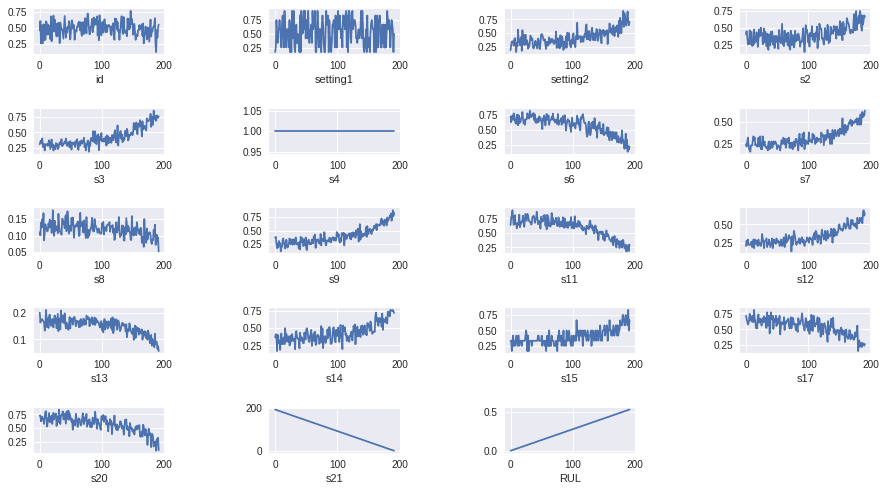

In [9]:
data = train[(train.id==1)].reset_index(drop = True)

fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=1.2, wspace=0.8)
for i in range(len(data.columns)-1):
    ax = fig.add_subplot(6, 4, i+1)
    ax.plot(data.loc[:,data.columns[i+1]])
    ax.set_xlabel(data.columns[i])

plt.show()

In [0]:
sequence_length = 50

In [0]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [0]:
def gen_sequence(id_df, seq_length, seq_cols):
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [13]:
sensor_cols = ['s' + str(i) for i in [2,3,4,6,7,8,9,11,12,13,14,15,17,20,21]]
sequence_cols = ['setting1', 'setting2', 'cycle_norm']
sequence_cols.extend(sensor_cols)

seq_gen = (list(gen_sequence(train[train['id']==id], sequence_length, sequence_cols)) 
           for id in train['id'].unique())

seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
print(seq_array.shape)

label_gen = [gen_labels(train[train['id']==id], sequence_length, ['RUL']) 
             for id in train['id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
print(label_array.shape)

(15631, 50, 18)
(15631, 1)


In [0]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [0]:
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]
model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(rate = 0.8))
model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(rate = 0.8))
model.add(Dense(units=nb_out))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 100)           47600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 77,851
Trainable params: 77,851
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_path = 'lstm_model.h5'

In [19]:
import time
start = time.time()

history = model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
stop = time.time()

model.save_weights('lstm_model.h5')

Instructions for updating:
Use tf.cast instead.
Train on 14849 samples, validate on 782 samples
Epoch 1/100
14849/14849 [==============================] - 18s 1ms/step - loss: 8930.0306 - mean_absolute_error: 75.8768 - r2_keras: -1.7529 - val_loss: 8339.5272 - val_mean_absolute_error: 72.9290 - val_r2_keras: -2.5411
Epoch 2/100
14849/14849 [==============================] - 16s 1ms/step - loss: 8259.8923 - mean_absolute_error: 71.9752 - r2_keras: -1.5448 - val_loss: 7817.3657 - val_mean_absolute_error: 69.8918 - val_r2_keras: -2.2925
Epoch 3/100
14849/14849 [==============================] - 16s 1ms/step - loss: 7761.1406 - mean_absolute_error: 69.0612 - r2_keras: -1.3904 - val_loss: 7322.5185 - val_mean_absolute_error: 67.0299 - val_r2_keras: -2.0588
Epoch 4/100
14849/14849 [==============================] - 16s 1ms/step - loss: 7284.9973 - mean_absolute_error: 66.3629 - r2_keras: -1.2430 - val_loss: 6858.4836 - val_mean_absolute_error: 64.3620 - val_r2_keras: -1.8414
Epoch 5/100
1484

In [20]:
print('Processing time =', stop-start, 'seconds')

Processing time = 1208.0441660881042 seconds


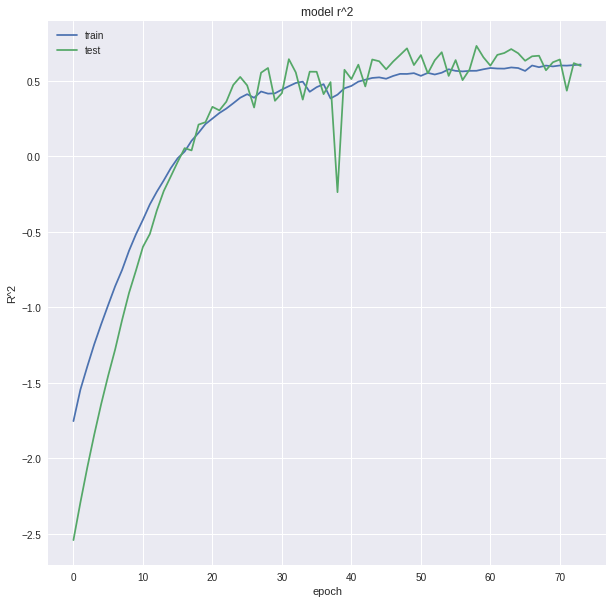

In [21]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title('model r^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_r2.png")

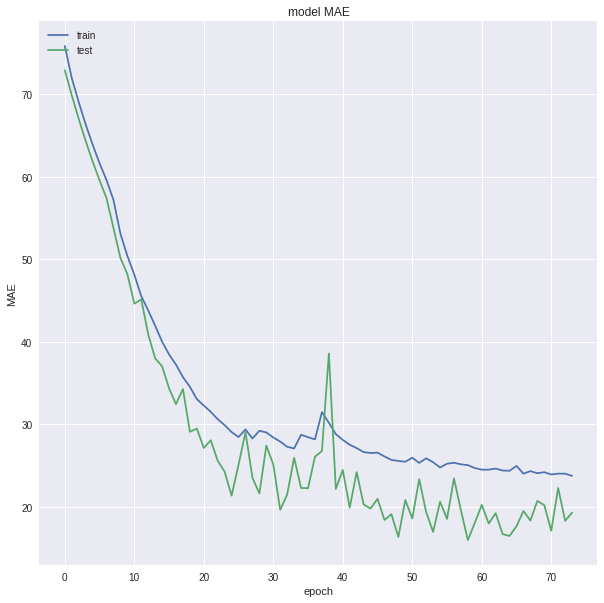

In [22]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_mae.png")

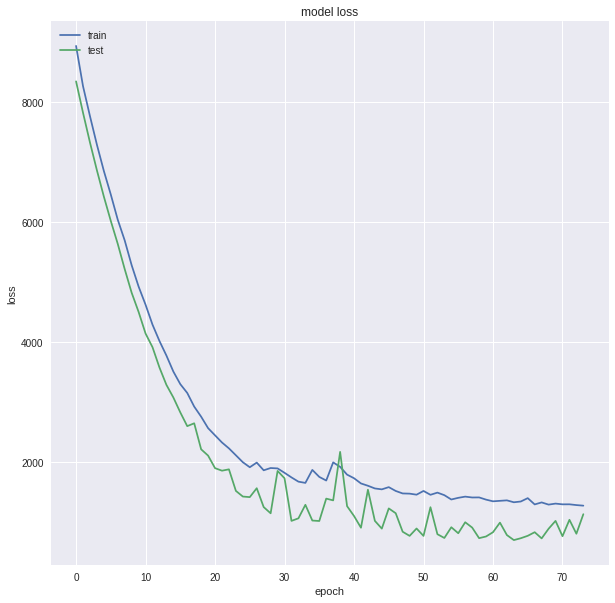

In [23]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_regression_loss.png")

In [0]:
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=64)
print('\nMAE: {}'.format(scores[1]))
print('\nR^2: {}'.format(scores[2]))

y_pred = model.predict(seq_array,verbose=1, batch_size=64)
y_true = label_array

test_set = pd.DataFrame(y_pred)
test_set.to_csv('submit_train.csv', index = False)

18631/18631 [==============================] - 20s 1ms/step

MAE: 52.36285323036075

R^2: -6.324139296762175
18631/18631 [==============================] - 21s 1ms/step


In [24]:
seq_array_test_last = [test[test['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test['id'].unique() if len(test[test['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
print("seq_array_test_last")

print(seq_array_test_last.shape)

seq_array_test_last
(93, 50, 18)


In [0]:
y_mask = [len(test[test['id']==id]) >= sequence_length for id in test['id'].unique()]
label_array_test_last = test.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)


MAE: 14.75392355970157

R^2: 0.7154991665194111


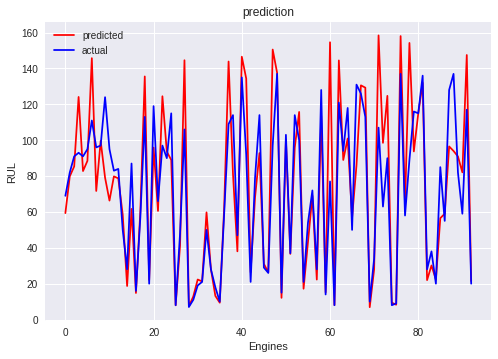

In [29]:

scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('\nMAE: {}'.format(scores_test[1]))
print('\nR^2: {}'.format(scores_test[2]))

y_pred_test = model.predict(seq_array_test_last)
y_true_test = label_array_test_last

test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('submit_test.csv', index = False)

plt.plot(y_pred_test, color="red")
plt.plot(y_true_test, color="blue")
plt.title('prediction')
plt.ylabel('RUL')
plt.xlabel('Engines')
plt.legend(['predicted', 'actual'], loc='upper left')
plt.show()
fig_verify.savefig("model_regression_verify.png")